In [11]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn



from sklearn.datasets import load_boston
boston = load_boston()


bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
print(bos.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [11]:
print(bos.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

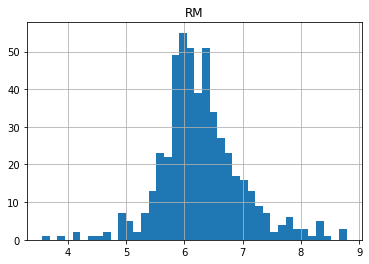

In [32]:
df = pd.DataFrame(bos['RM'])
hist = df.hist(bins=40)

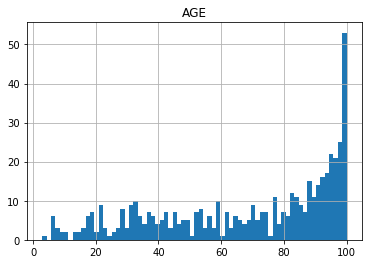

In [33]:
df = pd.DataFrame(bos['AGE'])
hist = df.hist(bins=70)

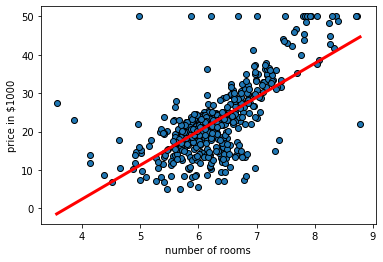

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
bos['PRICE'] = boston.target
regress = LinearRegression()
X_rooms = bos.RM
y_age = bos.PRICE
X_rooms = np.array(X_rooms).reshape(-1,1)
y_age = np.array(y_age).reshape(-1,1)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_rooms, y_age, test_size = 0.2, random_state=5)

reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)

r2 = round(reg_1.score(X_train_1, Y_train_1),2)

y_pred_1 = reg_1.predict(X_test_1)

r2 = round(reg_1.score(X_test_1, Y_test_1),2)

prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1) 
plt.scatter(X_rooms,y_age,edgecolors=(0, 0, 0))
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'red', linewidth = 3)
plt.ylabel('price in $1000')
plt.xlabel('number of rooms')
plt.show()
#Price is increasing in compare to increasing number of rooms. It means, that price is directly proportional to number of rooms. 


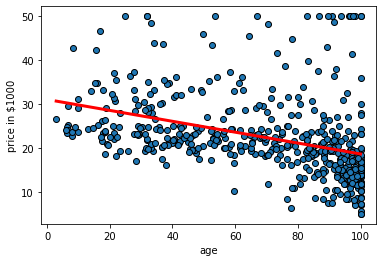

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
bos['PRICE'] = boston.target
regress = LinearRegression()
X_age = bos.AGE
y_price = bos.PRICE
X_age = np.array(X_age).reshape(-1,1)
y_price = np.array(y_price).reshape(-1,1)
X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(X_age, y_price, test_size = 0.2, random_state=5)

reg_1 = LinearRegression()
reg_1.fit(X_train_1, Y_train_1)

y_train_predict_1 = reg_1.predict(X_train_1)

r2 = round(reg_1.score(X_train_1, Y_train_1),2)

y_pred_1 = reg_1.predict(X_test_1)

r2 = round(reg_1.score(X_test_1, Y_test_1),2)

prediction_space = np.linspace(min(X_age), max(X_age)).reshape(-1,1) 
plt.scatter(X_age,y_price,edgecolors=(0, 0, 0))
plt.plot(prediction_space, reg_1.predict(prediction_space), color = 'red', linewidth = 3)
plt.ylabel('price in $1000')
plt.xlabel('age')
plt.show()

#Price is decreasing in compare to increasing age. It means, that price is inversely proportional to age
